# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Tratamento e limpeza de Dados</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data = pd.read_csv("./dados/pib_mba_avaliacao2022.csv")
data

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
0,1406,1,RIO GRANDE DO SUL,Igrejinha,2010.0,6.907114e+05,33551,20586.910156,Produto Interno Bruto per capita,2,5.1
1,4252,2,RIO GRANDE DO SUL,Três Coroas,2010.0,4.102403e+05,24786,16551.289062,Produto Interno Bruto per capita,2,4.8
2,998,3,RIO GRANDE DO SUL,Canoas,2010.0,1.644448e+07,332056,49523.199219,Produto Interno Bruto per capita,3,4.6
3,4292,4,RIO GRANDE DO SUL,Sapucaia do Sul,2010.0,1.767158e+06,126316,13989.980469,Produto Interno Bruto per capita,2,4.5
4,991,5,RIO GRANDE DO SUL,São Leopoldo,2010.0,3.302153e+06,211663,15600.990234,Produto Interno Bruto per capita,2,4.9
...,...,...,...,...,...,...,...,...,...,...,...
5563,150,5564,PIAUÍ,Alagoinha do Piauí,2010.0,2.727773e+04,7736,3526.080078,Produto Interno Bruto per capita,1,4.6
5564,4216,5565,PIAUÍ,Olho D'Água do Piauí,2010.0,1.029336e+04,2755,3736.250000,Produto Interno Bruto per capita,1,6.6
5565,137,5566,PIAUÍ,Passagem Franca do Piauí,2010.0,1.441198e+04,4246,3394.250000,Produto Interno Bruto per capita,1,5.1
5566,3861,5567,PIAUÍ,Barro Duro,2010.0,2.505022e+04,6853,3655.370117,Produto Interno Bruto per capita,1,4.7


Vamos utilizar uma base de dados baixada do IBGE com o PIB per capita para cada município brasileiro, essa base foi modificada para o propósito dos exercícios abaixo e possui as seguintes colunas:
* gid - identificador geográfico do município
* UF - unidade federativa
* nome - nome do município
* Censo - ano do censo relativo aos dados. Notar que houve censo agropecuário em 2007 e censo em 2010
* PIB - total do PIB
* Pop_est_2009 - populacao estimada	
* PIB_percapita - PIB per capita segundo os dados
* Descrição - Descrição do dados
* classe - classe do município
* desemprego - índice de desemprego na cidade no ano do Censo

Serão usadas duas versões dessa base de dados. Cada questão sempre carrega a base de dados antes do início para não haver dependência entre as questões.

### Questão 1)


Verifique a distribuição dos valores e tipos dos atributos e realize um tratamento de dados considerando:

1. Correção dos dados que for possível inferir o valor verdadeiro, ajustando e padronizando-os. Anote em quais variáveis isso ocorreu. Valores outliers não devem ser removidos/alterados, apenas dados não padronizados ou passíveis de correção.
2. Conversão dos atributos cujos valores foram corrigidos no item anterior, e que deveriam ser numéricos, para numérico - inspecione os valores para garantir que a conversão não vá gerar dados faltantes de forma desnecessária, substituindo por numeros os que forem possíveis como por exemplo o atributo "floor" como visto na aula em que substituímos dados por 0. Anote as variáveis em que isso ocorreu.
    
Quais variáveis possuiam valores que precisaram ser padronizados ou corrigidos, e quantos valores em cada uma delas foi possível corrigir?

(a) UF (12) <br>
(b) UF (12) e PopEst2009 (3)<br>
(c) UF (12) e Censo (4)<br>
(d) UF (9), Desemprego (10), PopEst2009 (3)<br>

---

In [82]:
# RESPOTA = UF = 12 E PoPEst2009 = 3

In [132]:
data = pd.read_csv("./dados/pib_mba_avaliacao2022.csv")
data.shape

(5568, 11)

In [133]:
# verificar atributos/colunas
# corrigir e padronizar valores nas colunas conforme possível

def verifica_atributos(df):
    for var in df:
        # imprime variavel e seu tipo
        print(var,":", df[var].dtype.name, end="")
        # se nao numérico
        if not np.issubdtype(df[var].dtype, np.number):
            print("\n\t",df[var].nunique(), "distintos: ", end="")
            print(df[var].unique())
        else:
            print(", intervalo: ",end="")
            print(df[var].min(), ",", df[var].max())

verifica_atributos(data)

id : int64, intervalo: 0 , 5569
gid : int64, intervalo: 1 , 5568
UF : object
	 39 distintos: ['RIO GRANDE DO SUL' 'SÃO PAULO' 'BAHIA' 'rio grande do sul '
 'R.G. DO SUL' 'bahia' 'TOCANTINS' 'RORAIMA' 'SERGIPE' 'PERNAMBUCO'
 'SANTA CATARINA' 'AMAZONAS' 'ESPIRITO SANTO' 'PIAUÍ' 'ALAGOAS' 'GOIÁS'
 'ACRE' 'PIAU' 'DISTRITO FEDERAL' 'MATO GROSSO' 'piauí' 'amazonas '
 'sergipe ' 'AMAPÁ' 'MATO GROSSO DO SUL' 'CEARÁ' 'RIO GRANDE DO NORTE'
 'MARANHÃO' 'RIO DE JANEIRO' 'PARÁ' 'MINAS GERAIS' 'PARAÍBA' 'PARANÁ'
 'MINAS G.' 'PARANA ' 'RONDÔNIA' 'PARANA' 'são paulo' 'SP']
nome : object
	 5292 distintos: ['Igrejinha' 'Três Coroas' 'Canoas' ... 'Passagem Franca do Piauí'
 'Barro Duro' 'Monte Alegre de Sergipe']
Censo : float64, intervalo: 2007.0 , 2028.0
PIB : float64, intervalo: 5770.28222656 , 1167951456.0
Pop_est_2009 : object
	 5078 distintos: ['33551' '24786' '332056' ... '7736' '2755' '13817']
PIB_percapita : float64, intervalo: 1929.9699707 , 360815.84375
Descrição : object
	 1 distintos: ['Prod

In [134]:
data["UF"].value_counts()

MINAS GERAIS           852
SÃO PAULO              644
RIO GRANDE DO SUL      494
BAHIA                  415
PARANÁ                 395
SANTA CATARINA         293
GOIÁS                  247
PARAÍBA                223
PIAUÍ                  222
MARANHÃO               217
PERNAMBUCO             186
CEARÁ                  184
RIO GRANDE DO NORTE    167
PARÁ                   143
MATO GROSSO            141
TOCANTINS              139
ALAGOAS                102
RIO DE JANEIRO          92
ESPIRITO SANTO          78
MATO GROSSO DO SUL      78
SERGIPE                 74
AMAZONAS                61
RONDÔNIA                52
ACRE                    22
AMAPÁ                   16
RORAIMA                 15
PARANA                   3
bahia                    2
sergipe                  1
amazonas                 1
piauí                    1
DISTRITO FEDERAL         1
R.G. DO SUL              1
rio grande do sul        1
MINAS G.                 1
PARANA                   1
PIAU                     1
s

In [143]:
# padronizando
data.loc[data['UF']=='PARANA','UF'] = 'PARANÁ'
data.loc[data['UF']=='bahia','UF'] = 'BAHIA'
data.loc[data['UF']=='sergipe ','UF'] = 'SERGIPE'
data.loc[data['UF']=='amazonas ','UF'] = 'AMAZONAS'
data.loc[data['UF']=='piauí','UF'] = 'PIAUÍ'
data.loc[data['UF']=='R.G. DO SUL','UF'] = 'RIO GRANDE DO SUL'
data.loc[data['UF']=='rio grande do sul ','UF'] = 'RIO GRANDE DO SUL'
data.loc[data['UF']=='MINAS G.','UF'] = 'MINAS GERAIS'
data.loc[data['UF']=='PIAU','UF'] = 'PIAUÍ'
data.loc[data['UF']=='são paulo','UF'] = 'SÃO PAULO'
data.loc[data['UF']=='SP','UF'] = 'SÃO PAULO'


In [144]:
data['Censo'].value_counts()

2010.0    5557
2007.0       6
2028.0       1
Name: Censo, dtype: int64

In [145]:
data.loc[data['desemprego'] > 100]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
1586,376,1588,MARANHÃO,Carutapera,2010.0,67091.46875,21121,3176.530029,Produto Interno Bruto per capita,1,407.0


In [146]:
data.loc[data['Censo'] == 2028]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
1752,3361,1754,SÃO PAULO,São Pedro,2028.0,348302.53125,31575,11030.959961,Produto Interno Bruto per capita,2,5.7


In [147]:
# inspecionando valores de Pop_est_2009
print(data.loc[~data['Pop_est_2009'].astype(str).str.isnumeric(), 'Pop_est_2009'].unique())

['3392”' '5948”' '18135”']


In [148]:
data.loc[data['Pop_est_2009'].apply(lambda x: x in ['“18135”','“5948”','“3392”'])]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego


In [149]:
data.loc[:,'Pop_est_2009'] = data.loc[:,'Pop_est_2009'].str.replace('“', '')
data.loc[data['Pop_est_2009'].apply(lambda x: x in ['“18135”','“5948”','“3392”'])]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego


In [150]:
# verificar atributos/colunas
# corrigir e padronizar valores nas colunas conforme possível

def verifica_atributos(df):
    for var in df:
        # imprime variavel e seu tipo
        print(var,":", df[var].dtype.name, end="")
        # se nao numérico
        if not np.issubdtype(df[var].dtype, np.number):
            print("\n\t",df[var].nunique(), "distintos: ", end="")
            print(df[var].unique())
        else:
            print(", intervalo: ",end="")
            print(df[var].min(), ",", df[var].max())

verifica_atributos(data)

id : int64, intervalo: 0 , 5569
gid : int64, intervalo: 1 , 5568
UF : object
	 27 distintos: ['RIO GRANDE DO SUL' 'SÃO PAULO' 'BAHIA' 'TOCANTINS' 'RORAIMA' 'SERGIPE'
 'PERNAMBUCO' 'SANTA CATARINA' 'AMAZONAS' 'ESPIRITO SANTO' 'PIAUÍ'
 'ALAGOAS' 'GOIÁS' 'ACRE' 'DISTRITO FEDERAL' 'MATO GROSSO' 'AMAPÁ'
 'MATO GROSSO DO SUL' 'CEARÁ' 'RIO GRANDE DO NORTE' 'MARANHÃO'
 'RIO DE JANEIRO' 'PARÁ' 'MINAS GERAIS' 'PARAÍBA' 'PARANÁ' 'RONDÔNIA']
nome : object
	 5292 distintos: ['Igrejinha' 'Três Coroas' 'Canoas' ... 'Passagem Franca do Piauí'
 'Barro Duro' 'Monte Alegre de Sergipe']
Censo : float64, intervalo: 2007.0 , 2028.0
PIB : float64, intervalo: 5770.28222656 , 1167951456.0
Pop_est_2009 : object
	 5078 distintos: ['33551' '24786' '332056' ... '7736' '2755' '13817']
PIB_percapita : float64, intervalo: 1929.9699707 , 360815.84375
Descrição : object
	 1 distintos: ['Produto Interno Bruto per capita']
classe : int64, intervalo: 1 , 5
desemprego : float64, intervalo: 0.1 , 407.0


### Questão 2)

1. Remova colunas que possuam valores constantes ou redundantes (cujo valor possa ser computado por meio do uso de outras colunas)
2. Exiba, e posteriormente remova muninícipios duplicados (considere apenas as colunas nome e UF para esse fim), mantendo a primeira ocorrência.

Quantas colunas e linhas foram removidas?

(a) 2 colunas, 3 linhas<br>
(b) 2 colunas, 5 linhas<br>
(c) 3 colunas, 3 linhas<br>
(d) 3 colunas, 5 linhas<br>

---

In [ ]:
# Resposta: 3 COLUNA (gid = index+1; descricao; um dos dados de pop) e 3 LINHAS

In [153]:
# recarregar base de dados
data = pd.read_csv("./dados/pib_mba_avaliacao2022.csv")
data.shape


(5568, 11)

In [154]:
data.head(5)

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
0,1406,1,RIO GRANDE DO SUL,Igrejinha,2010.0,6.907114e+05,33551,20586.910156,Produto Interno Bruto per capita,2,5.1
1,4252,2,RIO GRANDE DO SUL,Três Coroas,2010.0,4.102403e+05,24786,16551.289062,Produto Interno Bruto per capita,2,4.8
2,998,3,RIO GRANDE DO SUL,Canoas,2010.0,1.644448e+07,332056,49523.199219,Produto Interno Bruto per capita,3,4.6
3,4292,4,RIO GRANDE DO SUL,Sapucaia do Sul,2010.0,1.767158e+06,126316,13989.980469,Produto Interno Bruto per capita,2,4.5
4,991,5,RIO GRANDE DO SUL,São Leopoldo,2010.0,3.302153e+06,211663,15600.990234,Produto Interno Bruto per capita,2,4.9


In [155]:
for var in data:
    print(var, ' / únicos : ', data[var].unique().shape[0])

id  / únicos :  5567
gid  / únicos :  5565
UF  / únicos :  39
nome  / únicos :  5293
Censo  / únicos :  4
PIB  / únicos :  5563
Pop_est_2009  / únicos :  5078
PIB_percapita  / únicos :  5551
Descrição  / únicos :  1
classe  / únicos :  5
desemprego  / únicos :  107


In [156]:
# remover colunas encontradas
# busca os nomes das colunas cujo número de valores únicos é <= 1
att_const = np.array(data.columns[data.nunique() <= 1])
print(att_const)

['Descrição']


In [157]:
data_nred = data.drop(att_const, axis=1)
data_nred.shape

(5568, 10)

In [158]:
print(data_nred.loc[~data_nred['Pop_est_2009'].astype(str).str.isnumeric(), 'Pop_est_2009'].unique())

['“3392”' '“5948”' '“18135”']


In [159]:
data_nred.loc[:,'Pop_est_2009'] = data_nred.loc[:,'Pop_est_2009'].str.replace('“', '')
data_nred.loc[data_nred['Pop_est_2009'].apply(lambda x: x in ['“18135”','“5948”','“3392”'])]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego


In [160]:
data_nred.loc[:,'Pop_est_2009'] = pd.to_numeric(data_nred.loc[:,'Pop_est_2009'], downcast='integer', errors='coerce')
print(data_nred['Pop_est_2009'].unique())


[ 33551.  24786. 332056. ...   7736.   2755.  13817.]


In [161]:
print(data_nred.loc[~data_nred['Pop_est_2009'].astype(str).str.isnumeric(), 'Pop_est_2009'].unique())

[ 33551.  24786. 332056. ...   7736.   2755.  13817.]


In [162]:
# verificar atributos/colunas
# corrigir e padronizar valores nas colunas conforme possível

def verifica_atributos(df):
    for var in df:
        # imprime variavel e seu tipo
        print(var,":", df[var].dtype.name, end="")
        # se nao numérico
        if not np.issubdtype(df[var].dtype, np.number):
            print("\n\t",df[var].nunique(), "distintos: ", end="")
            print(df[var].unique())
        else:
            print(", intervalo: ",end="")
            print(df[var].min(), ",", df[var].max())

verifica_atributos(data_nred)

id : int64, intervalo: 0 , 5569
gid : int64, intervalo: 1 , 5568
UF : object
	 39 distintos: ['RIO GRANDE DO SUL' 'SÃO PAULO' 'BAHIA' 'rio grande do sul '
 'R.G. DO SUL' 'bahia' 'TOCANTINS' 'RORAIMA' 'SERGIPE' 'PERNAMBUCO'
 'SANTA CATARINA' 'AMAZONAS' 'ESPIRITO SANTO' 'PIAUÍ' 'ALAGOAS' 'GOIÁS'
 'ACRE' 'PIAU' 'DISTRITO FEDERAL' 'MATO GROSSO' 'piauí' 'amazonas '
 'sergipe ' 'AMAPÁ' 'MATO GROSSO DO SUL' 'CEARÁ' 'RIO GRANDE DO NORTE'
 'MARANHÃO' 'RIO DE JANEIRO' 'PARÁ' 'MINAS GERAIS' 'PARAÍBA' 'PARANÁ'
 'MINAS G.' 'PARANA ' 'RONDÔNIA' 'PARANA' 'são paulo' 'SP']
nome : object
	 5292 distintos: ['Igrejinha' 'Três Coroas' 'Canoas' ... 'Passagem Franca do Piauí'
 'Barro Duro' 'Monte Alegre de Sergipe']
Censo : float64, intervalo: 2007.0 , 2028.0
PIB : float64, intervalo: 5770.28222656 , 1167951456.0
Pop_est_2009 : float64, intervalo: 837.0 , 11037593.0
PIB_percapita : float64, intervalo: 1929.9699707 , 360815.84375
classe : int64, intervalo: 1 , 5
desemprego : float64, intervalo: 0.1 , 407.0


In [163]:
mat_corr = data_nred.corr(method = 'pearson')
mat_corr

,id,gid,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
id,1.000000,-0.003864,0.007373,-0.022820,0.006516,0.006504,0.016915,-0.022705
gid,-0.003864,1.000000,0.001478,0.005075,0.006607,0.055814,0.083581,0.020137
Censo,0.007373,0.001478,1.000000,0.000148,0.001179,0.000571,0.006162,-0.000219
PIB,-0.022820,0.005075,0.000148,1.000000,0.339456,0.048044,0.054191,-0.000912
Pop_est_2009,0.006516,0.006607,0.001179,0.339456,1.000000,0.084113,0.110909,0.008612
PIB_percapita,0.006504,0.055814,0.000571,0.048044,0.084113,1.000000,0.771292,-0.053388
classe,0.016915,0.083581,0.006162,0.054191,0.110909,0.771292,1.000000,-0.087766
desemprego,-0.022705,0.020137,-0.000219,-0.000912,0.008612,-0.053388,-0.087766,1.000000


In [164]:
mat_corr = np.abs(mat_corr)
mat_corr

,id,gid,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
id,1.000000,0.003864,0.007373,0.022820,0.006516,0.006504,0.016915,0.022705
gid,0.003864,1.000000,0.001478,0.005075,0.006607,0.055814,0.083581,0.020137
Censo,0.007373,0.001478,1.000000,0.000148,0.001179,0.000571,0.006162,0.000219
PIB,0.022820,0.005075,0.000148,1.000000,0.339456,0.048044,0.054191,0.000912
Pop_est_2009,0.006516,0.006607,0.001179,0.339456,1.000000,0.084113,0.110909,0.008612
PIB_percapita,0.006504,0.055814,0.000571,0.048044,0.084113,1.000000,0.771292,0.053388
classe,0.016915,0.083581,0.006162,0.054191,0.110909,0.771292,1.000000,0.087766
desemprego,0.022705,0.020137,0.000219,0.000912,0.008612,0.053388,0.087766,1.000000


In [165]:
# o parametro k indica para nao incluir a diagonal principal
mask_tri = np.triu(np.ones(mat_corr.shape),k=1).astype(bool)
print(mask_tri)

[[False  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True]
 [False False False  True  True  True  True  True]
 [False False False False  True  True  True  True]
 [False False False False False  True  True  True]
 [False False False False False False  True  True]
 [False False False False False False False  True]
 [False False False False False False False False]]


In [166]:
tri_sup = mat_corr.where(mask_tri)
print(tri_sup)

               id       gid     Censo       PIB  Pop_est_2009  PIB_percapita  \
id            NaN  0.003864  0.007373  0.022820      0.006516       0.006504   
gid           NaN       NaN  0.001478  0.005075      0.006607       0.055814   
Censo         NaN       NaN       NaN  0.000148      0.001179       0.000571   
PIB           NaN       NaN       NaN       NaN      0.339456       0.048044   
Pop_est_2009  NaN       NaN       NaN       NaN           NaN       0.084113   
PIB_percapita NaN       NaN       NaN       NaN           NaN            NaN   
classe        NaN       NaN       NaN       NaN           NaN            NaN   
desemprego    NaN       NaN       NaN       NaN           NaN            NaN   

                 classe  desemprego  
id             0.016915    0.022705  
gid            0.083581    0.020137  
Censo          0.006162    0.000219  
PIB            0.054191    0.000912  
Pop_est_2009   0.110909    0.008612  
PIB_percapita  0.771292    0.053388  
classe       

In [167]:
atrib_altacor = [col for col in tri_sup.columns if any(tri_sup[col] >= 0.95)]

In [168]:
atrib_altacor

[]

In [169]:
# inspecionar colunas por valores constantes e redundantes

data_nred[data_nred.duplicated(['nome','UF'], keep='first')]

,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
1113,5569,1115,GOIÁS,Pirenópolis,2010.0,182077.437500,20945.0,8693.120117,1,4.2
3474,1737,3475,PERNAMBUCO,Pesqueira,NaN,290683.656250,64454.0,4509.939941,1,7.6
3766,3112,3766,SÃO PAULO,Gavião Peixoto,2010.0,165148.078125,4244.0,38913.308594,3,6.5


In [170]:
d_ndup = data_nred.drop_duplicates(['nome','UF'], keep='first')

In [171]:
d_ndup.shape

(5565, 10)

---
### Questão 3)

Vamos analisar possíveis outliers nas colunas numéricas. Utilize o método da análise da dispersão pelo *desvio padrão* e inspecione as colunas 'gid', 'PIB', 'Pop_est_2009', 'desemprego', procurando por outliers globais para além de 2.5 desvios padrões com relação à média, i.e. $2.5\sigma$. Não remova outliers da base de dados, apenas identifique-os.

Quantos outliers foram encontrados, respectivamente, para 'gid', 'PIB', 'Pop_est_2009' e 'desemprego'?

(a) 0, 6, 35, 2<br>
(b) 0, 6, 27, 1<br>
(c) 0, 5, 27, 1<br>
(d) 1, 5, 35, 2<br>


In [172]:
data = pd.read_csv("./dados/pib_mba_avaliacao2022_B.csv")

In [173]:
# encontrar outliers
def remove_outliers_std(df, attributes, t):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            crit_std = df[var].std() * t
            mu = df[var].mean()
            
            tot_out = np.sum((df[var] < mu-crit_std) | (df[var] > mu+crit_std))
            
            # apenas inliers segundo std
            dfn = dfn.loc[(df[var] >= mu-crit_std) & (df[var] <= mu+crit_std),:]
            print('%s, mu = %.2f, std = %.2f, outliers = %d' % (var, mu, crit_std/t, tot_out))
            
    return dfn

In [174]:
data_out = remove_outliers_std(data,['gid'], 2.5)
data_out = remove_outliers_std(data_out,['PIB'], 2.5)
data_out = remove_outliers_std(data_out,['Pop_est_2009'], 2.5)
data_out = remove_outliers_std(data_out,['desemprego'], 2.5)

gid, mu = 2784.90, std = 1606.83, outliers = 0
PIB, mu = 861698.21, std = 17668286.53, outliers = 6
Pop_est_2009, mu = 30545.93, std = 101843.87, outliers = 81
desemprego, mu = 6.64, std = 5.74, outliers = 1


---

### Questão 4)

Imprima o total de valores faltantes na variável 'desemprego'. Em contato com a equipe especialista, fomos informados que uma boa forma de preencher esses valores seria o preenchimento pela média do desemprego no estado referente ao dado faltante. Assim, iremos preencher os valores `nan` de 'desemprego' com as médias agrupadas por 'UF'.

Para isso codifique uma função que deverá:
1. calcular a média de uma variável alvo A (a ser preenchida) relativa a (ou agrupada por) cada valor distinto de uma variável categórica B que se deseja usar para agrupar; no nosso caso A='desemprego' e B='UF';
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente;
3. garantir que o valor atribuido tenha o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

Realize o preenchimento dos dados faltantes utilizando o método da média agrupada por UF.

Quantos dados faltantes existiam em "desemprego" antes da operação, e qual a média e o desvio padrão dessa variável após o preenchimento?

(a) 53 faltantes, média 6.641, desvio padrão 5.672<br>
(b) 55 faltantes, média 6.641, desvio padrão 5.672<br>
(c) 53 faltantes, média 6.636, desvio padrão 5.697<br>
(d) 55 faltantes, média 6.636, desvio padrão 5.697<br>

In [175]:
# recarregar base de dados
data = pd.read_csv("./dados/pib_mba_avaliacao2022_B.csv")

In [176]:
# verificar atributos faltantes
# preencher faltantes
# computar media e desvio padrao

def missing_condmean(df, att, att_cat):
        
    dfn = df.copy()
    print('- preencher ', att, ' condicionado a ', att_cat, end=' : ')
    nullatt = dfn[att].isnull()
    print(np.sum(nullatt), 'faltantes')

    for j in df[att_cat].unique():
        mu_cat = np.round(np.mean(df.loc[df[att_cat]==j, att]),1)
        std_cat = np.round(np.std(df.loc[df[att_cat]==j, att]),1)

        if (df[att_cat].dtypes == np.int64):
            mu_cat = np.round(mu_cat,0)
            std_cat = np.round(std_cat,0)
            
        print('\t %s media = %.1f' % (j, mu_cat))
        print('\t %s std deviation = %.1f' % (j, std_cat))
        dfn.loc[(df[att].isnull()) & (df[att_cat]==j), att] = mu_cat
        
        
    return dfn

In [177]:
data_fill = missing_condmean(data, 'desemprego', 'UF')
data_fill[data['desemprego'].isnull()].head()

print('Média do atributo antes do preenchimento: ', np.round(np.mean(data.loc[:, 'desemprego']),2))
print('Depois do preenchimento: ', np.round(np.mean(data_fill.loc[:, 'desemprego']),2))
print('Depois do preenchimento, Std Deviation: ', np.round(np.std(data_fill.loc[:, 'desemprego']),2))

- preencher  desemprego  condicionado a  UF : 53 faltantes
	 RIO GRANDE DO SUL media = 4.5
	 RIO GRANDE DO SUL std deviation = 0.8
	 SÃO PAULO media = 6.9
	 SÃO PAULO std deviation = 0.9
	 BAHIA media = 9.1
	 BAHIA std deviation = 0.7
	 TOCANTINS media = 5.9
	 TOCANTINS std deviation = 0.7
	 RORAIMA media = 7.6
	 RORAIMA std deviation = 0.7
	 SERGIPE media = 8.4
	 SERGIPE std deviation = 0.7
	 PERNAMBUCO media = 8.6
	 PERNAMBUCO std deviation = 0.7
	 SANTA CATARINA media = 6.8
	 SANTA CATARINA std deviation = 0.7
	 AMAZONAS media = 8.1
	 AMAZONAS std deviation = 0.8
	 ESPIRITO SANTO media = 7.6
	 ESPIRITO SANTO std deviation = 0.7
	 PIAUÍ media = 5.8
	 PIAUÍ std deviation = 0.8
	 ALAGOAS media = 9.4
	 ALAGOAS std deviation = 0.7
	 GOIÁS media = 4.7
	 GOIÁS std deviation = 0.8
	 ACRE media = 4.1
	 ACRE std deviation = 0.8
	 DISTRITO FEDERAL media = 8.1
	 DISTRITO FEDERAL std deviation = 0.0
	 MATO GROSSO media = 7.2
	 MATO GROSSO std deviation = 0.8
	 AMAPÁ media = 12.7
	 AMAPÁ std devi

---

### Questão 5)

Desejamos projetar um algoritmo para, por meio dos atributos de entrada 'PIB', 'Pop_est_2009', 'desemprego', classificar se um município pertence à classes 1 ou 2, ou pertence à classes 3, 4 ou 5. Realize os seguintes passos:

1. gere um rótulo/label binário, que é `0` para municípios cujo atributo classe seja 1 ou 2, e `1` para municípios de classe 3, 4 ou 5;
2. preencha todos os atributos faltantes da base de dados com o valor `0`;
3. prepare a base de dados de treinamento `X` contendo apenas as colunas 'PIB', 'Pop_est_2009', 'desemprego', e os rótulos `y` binários conforme passo 1, de forma a ser aceito como entrada nas bibliotecas `sklearn` e `imblearn`;
4. gere uma nova base de dados rebalanceada `Xs` e `ys` por meio do método `over_sampling.SMOTE(random_state=0)`; 
5. treine o classificador 1 do tipo `DecisionTreeClassifier(max_depth=3, random_state=0)` nos dados originais `X`, `y`, e verifique a acurácia balanceada na predição do conjunto de treinamento `X`, i.e. gerando `y_pred = classif1.predict(X)` e computando `balanced_accuracy_score(y, y_pred)`; 
6. treine um novo classificador 2 do tipo `DecisionTreeClassifier(max_depth=3, random_state=0)` nos dados balanceados por SMOTE: `Xs`, `ys`, e verifique a acurácia balanceada na predição no conjunto de treinamento `X`, i.e. gerando `y_pred_s = classif2.predict(X)` e computando `balanced_accuracy_score(y, y_pred_s)`. 

OBS: as duas acurácias são computadas no mesmo conjunto `X` relativo ao conjunto de treinamento original.

Quais foram as acurácias balanceadas de treinamento resultantes do classificador 1 (treinado com dados originais) e do classificador 2 (treinado com dados relabanceados)? 

(a) Classificador 1: 51%,  Classificador 2: 67% <br>
(b) Classificador 1: 67%,  Classificador 2: 70% <br>
(c) Classificador 1: 67%,  Classificador 2: 89% <br>
(d) Classificador 1: 84%,  Classificador 2: 89% <br>

In [178]:
# bibliotecas necessarias
from imblearn import over_sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# carregar base de dados
data = pd.read_csv("./dados/pib_mba_avaliacao2022_B.csv")

In [179]:
# 1 - gerar rotulos binários
data['rotulo'] = data['classe'].map({1: '0', 2: '0', 3:'1', 4:'1', 5:'1'})

data


,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego,rotulo
0,1406,1,RIO GRANDE DO SUL,Igrejinha,2010.0,6.907114e+05,33551,20586.910156,Produto Interno Bruto per capita,2,5.1,0
1,4252,2,RIO GRANDE DO SUL,Três Coroas,2010.0,4.102403e+05,24786,16551.289062,Produto Interno Bruto per capita,2,4.8,0
2,998,3,RIO GRANDE DO SUL,Canoas,2010.0,1.644448e+07,332056,49523.199219,Produto Interno Bruto per capita,3,0.0,1
3,4292,4,RIO GRANDE DO SUL,Sapucaia do Sul,2010.0,1.767158e+06,126316,13989.980469,Produto Interno Bruto per capita,2,4.5,0
4,991,5,RIO GRANDE DO SUL,São Leopoldo,2010.0,3.302153e+06,211663,15600.990234,Produto Interno Bruto per capita,2,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5563,150,5564,PIAUÍ,Alagoinha do Piauí,2010.0,2.727773e+04,7736,3526.080078,Produto Interno Bruto per capita,1,4.6,0
5564,4216,5565,PIAUÍ,Olho D'Água do Piauí,2010.0,1.029336e+04,2755,3736.250000,Produto Interno Bruto per capita,1,6.6,0
5565,137,5566,PIAUÍ,Passagem Franca do Piauí,2010.0,1.441198e+04,4246,3394.250000,Produto Interno Bruto per capita,1,5.1,0
5566,3861,5567,PIAUÍ,Barro Duro,2010.0,2.505022e+04,6853,3655.370117,Produto Interno Bruto per capita,1,4.7,0


In [180]:
# 2 - preencher faltantes
def check_missing_att(df):
    # verificando atributos faltantes
    for var in df:
        # somamos o número de variáveis nulas (NaN)
        nullatt = np.sum(df[var].isnull())
        if nullatt > 0:
            print(var,"- faltantes: ", end='')
            print(nullatt)

In [181]:
check_missing_att(data)

nome - faltantes: 2
Censo - faltantes: 4
PIB - faltantes: 1
PIB_percapita - faltantes: 4
desemprego - faltantes: 53


In [182]:
data_fill0 = data.fillna(0)

In [183]:
check_missing_att(data_fill0)

In [184]:
# 3 - preparar base de dados (nesse caso nao terá base de teste por peculiaridade do exercicio)
X = data_fill0[['PIB','Pop_est_2009', 'desemprego']]
Y = data_fill0['rotulo']

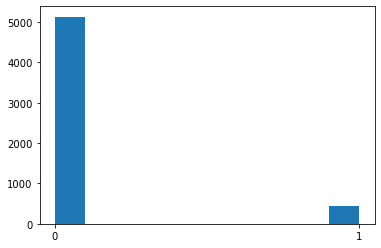

In [185]:
h = plt.hist(Y)

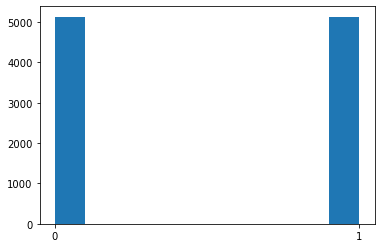

In [186]:
# 4 - realizar oversampling
oversamp = over_sampling.SMOTE(random_state=0) # sampling_strategy pode ser usado para casos binários
Xs, Ys = oversamp.fit_resample(X, Y)
h = plt.hist(Ys)

In [187]:
# 5 - treinar/avaliar classificador 1
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X,Y)
ZY_ = clf.predict(X)

In [188]:
accb_base = metrics.balanced_accuracy_score(Y, ZY_)
print("Acurácia balanceada: %0.2f" % (accb_base*100))

Acurácia balanceada: 67.46


In [189]:
# 6 - treinar/avaliar classificador 2
clf_2 = DecisionTreeClassifier(max_depth=3, random_state=0)
clf_2.fit(Xs,Ys)
ZYs_ = clf_2.predict(X)

In [190]:
accb_base = metrics.balanced_accuracy_score(Y, ZYs_)
print("Acurácia balanceada: %0.2f" % (accb_base*100))

Acurácia balanceada: 89.36
